In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

import viz_helpers as helpers
from heatmap import make_heatmap, matricize_df

# Seaborn style defaults. Relevant changes for us are default font, and no ticks for heatmaps
sns.set_theme()

df = helpers.load_df()
df.head()

Crunching 59 prefixes and 72 suffixes, for a total of 4248 combinations.


,pre,suff,count,wikt
0,cum,wad,385,True
1,cum,bag,1629,False
2,cum,bucket,4557,True
3,cum,sack,218,False
4,cum,ball,661,True


In [6]:
import re

from compute_counts import load_comments, is_valid_comment

# A nucleus of letters, optionally surrounded by non-alphabetic characters
monopatt = re.compile('[^a-zA-Z]*[a-zA-Z]*[^a-zA-Z]*$')
def is_mono(c):
    return re.match(monopatt, c['body'])
    

def get_monoword_comments():
    comms = []
    for term in helpers.all_compounds():
        term_comments, _ = load_comments(term)
        # Add a key indicating the term in play
        [c.update(term=term) for c in term_comments]
        comms += [c for c in term_comments if is_mono(c) and is_valid_comment(c, term)]
    return comms

monos = get_monoword_comments()
mono_df = pd.DataFrame(monos)
len(monos)

49990

In [5]:
monos[1002]

{'body': '*Cumlord',
 'created_utc': 1526838723,
 'permalink': '/r/Roadcam/comments/8ktaah/usa_oc_battle_scarred_van_doesnt_give_up/dzaiu3p/',
 'score': 17,
 'subreddit': 'Roadcam'}

In [7]:
mono_df.head()

,body,created_utc,permalink,score,subreddit,total_awards_received,term,author
0,Cumwad,1589356756,/r/naturecanada/comments/fek34t/i_love_bc_chil...,1.0,naturecanada,0.0,cumwad,NaN
1,cumwad,1589235255,/r/TwoSentenceHorror/comments/ghvays/i_used_to...,2.0,TwoSentenceHorror,0.0,cumwad,NaN
2,Cumwad 4000,1586458870,/r/MouseReview/comments/fxvjmu/what_mouse_is_t...,0.0,MouseReview,0.0,cumwad,NaN
3,Cumwad,1581076713,/r/ComedyNecrophilia/comments/eztp67/_/fgs8s85/,1.0,ComedyNecrophilia,0.0,cumwad,NaN
4,Cumwad.,1573841090,/r/blursedimages/comments/dwoc4v/blursed_ussr/...,1.0,blursedimages,0.0,cumwad,NaN


In [8]:
mono_df.score.describe()

count    49988.00000
mean         3.87475
std         66.27913
min       -115.00000
25%          1.00000
50%          1.00000
75%          2.00000
max      12919.00000
Name: score, dtype: float64

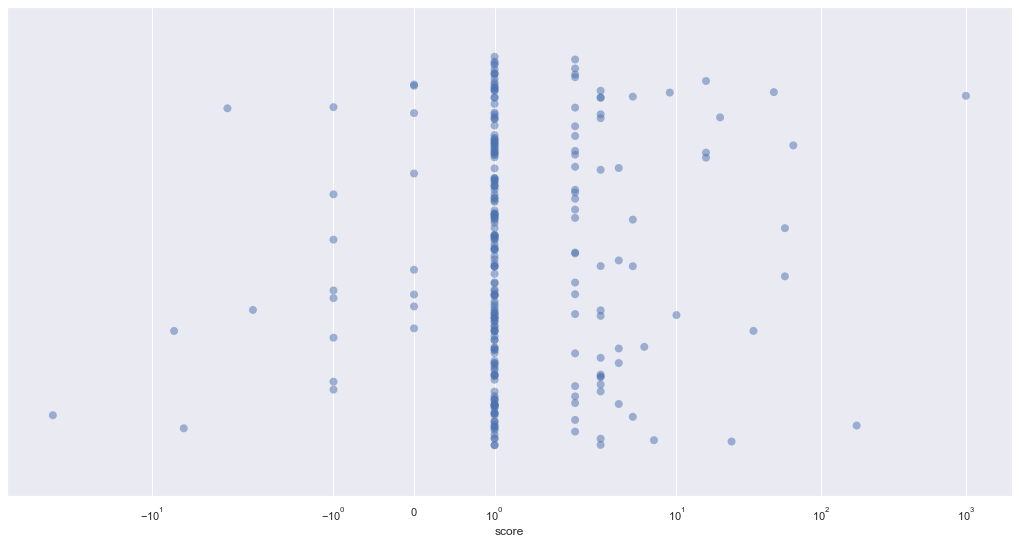

In [85]:
import seaborn as sns
from matplotlib import pyplot as plt

FS = (18, 9)
fig, ax = plt.subplots(figsize=FS)

ax.set_xscale('symlog')
sns.stripplot(
    data=mono_df.sample(250, random_state=1337),
    x='score',
    alpha=.5,
    size=8,
    jitter=0.4,
);

In [9]:
mono_df.sort_values(by='score', ascending=False).head(25)

,body,created_utc,permalink,score,subreddit,total_awards_received,term,author
35438,Gaylord,1497889457,NaN,12919.0,AskReddit,NaN,gaylord,NaN
43276,Dogbro,1410214419,NaN,3706.0,AskReddit,NaN,dogbro,NaN
7730,# **shitballs**,1561669377,/r/AskReddit/comments/c64p6o/women_of_reddit_w...,2828.0,AskReddit,0.0,shitballs,NaN
25088,Pussycake,1396632772,NaN,2404.0,IAmA,NaN,pussycake,NaN
448,Cumball?,1578229072,/r/crappyoffbrands/comments/ekcizd/what_is_thi...,1439.0,crappyoffbrands,0.0,cumball,NaN
3198,cumfart,1442247854,NaN,1413.0,CrappyDesign,NaN,cumfart,NaN
35086,Gaylord,1537128293,/r/AskReddit/comments/9gcxk2/what_names_like_a...,1244.0,AskReddit,NaN,gaylord,NaN
35835,Gaylord,1407718614,NaN,1198.0,AskReddit,NaN,gaylord,NaN
35649,Gaylord,1454601570,NaN,993.0,AskReddit,NaN,gaylord,NaN
28930,Fuckface,1559213247,/r/instant_regret/comments/burnoy/got_what_he_...,949.0,instant_regret,0.0,fuckface,NaN


In [50]:
import requests
import time

def fetch_comment(row):
    url = f'https://api.pushshift.io/reddit/comment/search?limit=100&sort=asc&after={row.created_utc-1}&q={row.term}'
    resp = requests.get(url, headers={'User-Agent': 'my ipython notebook'})
    return resp.json()['data'][0]

def url_for_row(row):
    if isinstance(row.permalink, str):
        return 'https://reddit.com' + row.permalink
    comm = fetch_comment(row)
    return f"https://reddit.com/r/{comm['subreddit']}/comments/{comm['link_id'][3:]}"

row = mono_df.sort_values(by='score', ascending=False).head(25).iloc[14]
url = url_for_row(row)
print(url)

https://reddit.com/r/interestingasfuck/comments/is7z8e/a_japanese_hobby_trend_is_polishing_tin_foil/g56695o/


Looks like early comments don't have 'permalink' attribute, but can sort of hack it together based on id / link_id metadata.

1. [Gaylord](https://www.reddit.com/r/AskReddit/comments/6i6vxr/what_first_name_is_not_used_anymore/dj40rbn/)
2. [Dogbro](https://www.reddit.com/r/AskReddit/comments/2ftvx1/whats_the_most_useful_thing_you_learned_during_sex/ckcva13/?context=10000)
3. [# **shitballs**](https://www.reddit.com/r/AskReddit/comments/c64p6o/women_of_reddit_what_are_some_things_a_dad_should/es7ernk/?context=10000)
4. [Pussycake](https://www.reddit.com/r/IAmA/comments/2278w4/nick_offerman_funambulist_returning_for_more_ama/cgk23pn/?context=10000)
5. [Cumball?](https://www.reddit.com/r/crappyoffbrands/comments/ekcizd/what_is_this/fd969ph/)
6. [cumfart](https://www.reddit.com/r/CrappyDesign/comments/3kx77m/comfart/cv19rbl/)
7. [Gaylord](https://reddit.com/r/AskReddit/comments/9gcxk2/what_names_like_adolf_are_not_socially_acceptable/e63c5oe/)
8. [Gaylord](https://www.reddit.com/r/AskReddit/comments/2d6lou/what_old_person_name_should_make_a_comeback/cjmo45v/)
9. [Gaylord](https://www.reddit.com/r/AskReddit/comments/445qs7/what_animal_has_a_stupid_name/cznmvvj/?context=10000)
10. [Fuckface](https://www.reddit.com/r/instant_regret/comments/burnoy/got_what_he_deserved/epggu64/) (might be the top-ranking pejorative usage - +949)
11. [Dipshit*](https://www.reddit.com/r/memes/comments/jvt90d/absolutely_outstanding/gcmaqx6/?context=10000)
12. [Dicksucker](https://www.reddit.com/r/WTF/comments/6n772z/sperm_donation_extractor/dk7kfbr/?context=10000)
13. [Twatwaffle.](https://www.reddit.com/r/AskReddit/comments/vpgjv/whats_your_favorite_insult_that_isnt_used_as/c56hg4h/) (use-mention)
14. "femoid" (not accessible - in banned subreddit /r/inceltears)
15. [Dirtballs](https://www.reddit.com/r/interestingasfuck/comments/is7z8e/a_japanese_hobby_trend_is_polishing_tin_foil/g565c9j/) (comment deleted - link is to parent). +684 and 5 awards.

Most negative comments are less interesting since they'll tend to just be trollish (and often deleted). The lowest (-115) is deleted. [this](https://www.reddit.com/r/RealGirls/comments/2v4wjr/backseat/coeqmy1/) comment in a porn sub is the second-lowest ("Ratface", -54).

In [15]:
print(
    'reddit.com' + mono_df.sort_values(by='score', ascending=False).head(25).iloc[9].permalink
)

reddit.com/r/instant_regret/comments/burnoy/got_what_he_deserved/epggu64/


In [51]:
mono_df.sort_values(by='score', ascending=True).head(25)

,body,created_utc,permalink,score,subreddit,total_awards_received,term,author
18656,#DICKASS,1439451844,NaN,-115.0,videos,NaN,dickass,NaN
44991,Ratface,1423372127,NaN,-54.0,RealGirls,NaN,ratface,NaN
4810,Shitbag,1490829782,NaN,-54.0,todayilearned,NaN,shitbag,Shitbag_CID_Agent
43892,Dogshit,1608439209,/r/CallOfDuty/comments/kgkhjx/mw_how_did_i_hit...,-54.0,CallOfDuty,0.0,dogshit,NaN
32407,Dumbass,1608530452,/r/gtaonline/comments/kh3yen/how_many_times_im...,-48.0,gtaonline,0.0,dumbass,NaN
25044,Pussyboi,1494763719,NaN,-47.0,justneckbeardthings,NaN,pussyboi,NaN
35982,gayboy,1542082245,/r/AskOuija/comments/9wh4fb/stan_lee_was_a/e9l...,-46.0,AskOuija,NaN,gayboy,NaN
22277,Cockstain?,1532102510,/r/whatstheword/comments/90h0d1/wtw_for_a_spid...,-46.0,whatstheword,NaN,cockstain,NaN
30818,Wankhead,1446415472,NaN,-45.0,formula1,NaN,wankhead,NaN
47059,Libtard,1605726039,/r/MURICA/comments/jwgt0v/murica/gcqw19k/,-44.0,MURICA,0.0,libtard,NaN


In [53]:
row = mono_df.sort_values(by='score', ascending=True).head(25).iloc[1]
url = url_for_row(row)
print(url)

https://reddit.com/r/RealGirls/comments/2v4wjr
